### 轮廓系数分析法使用示例

 当 n_clusters =  2 时，轮廓系数为:  0.7049787496083262
 当 n_clusters =  3 时，轮廓系数为:  0.5882004012129721
 当 n_clusters =  4 时，轮廓系数为:  0.6505186632729437
 当 n_clusters =  5 时，轮廓系数为:  0.561464362648773
 当 n_clusters =  6 时，轮廓系数为:  0.4857596147013469


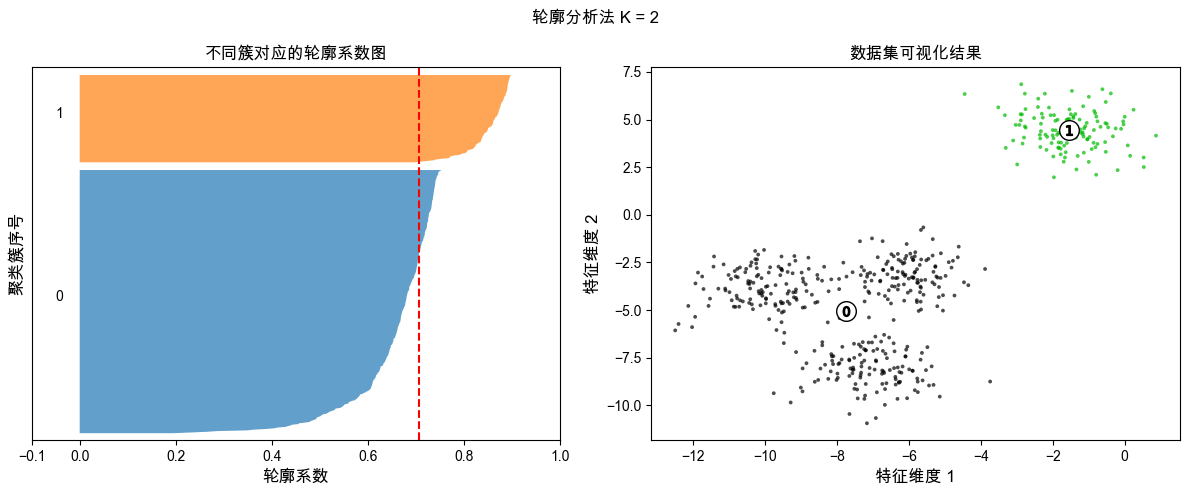

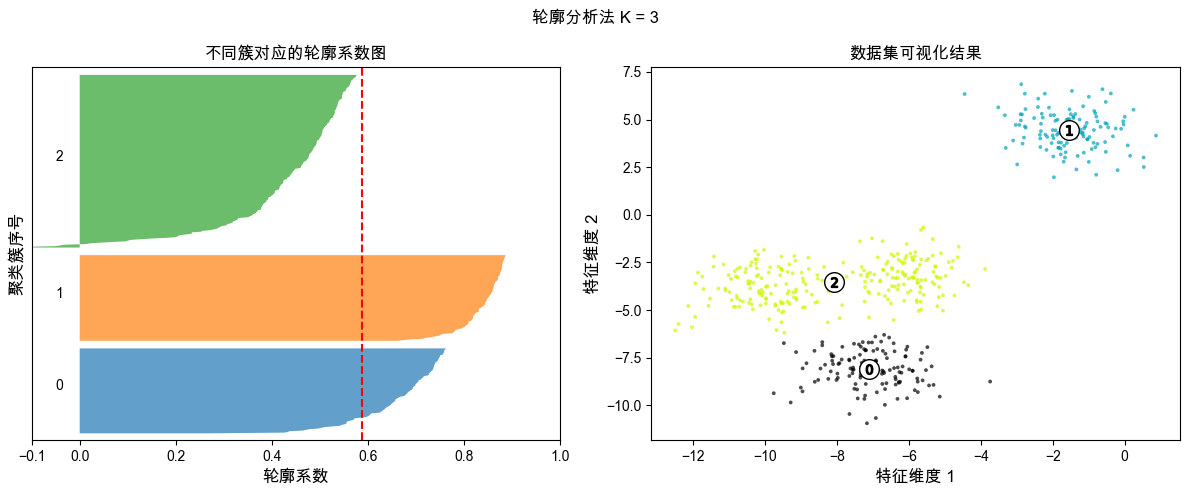

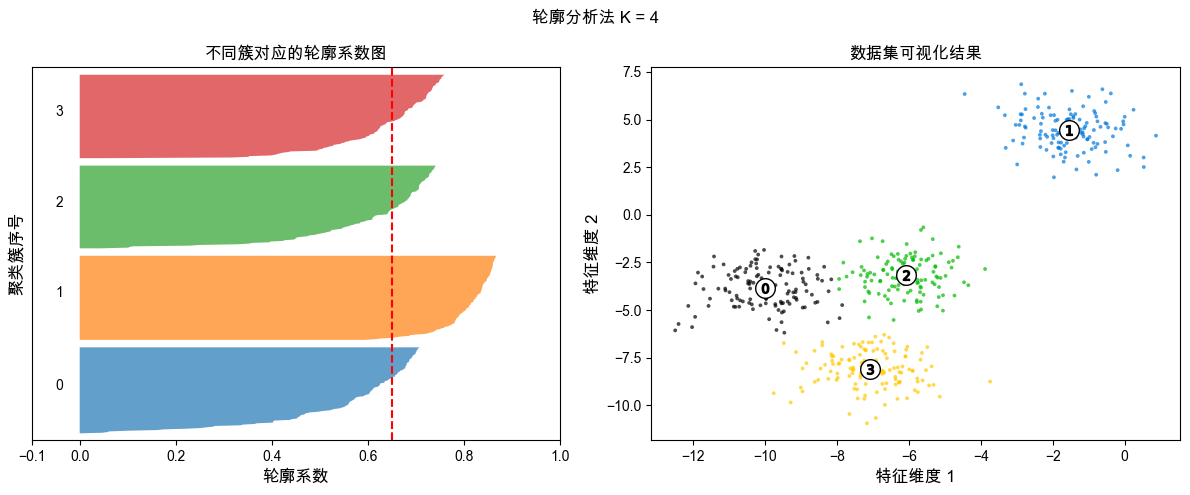

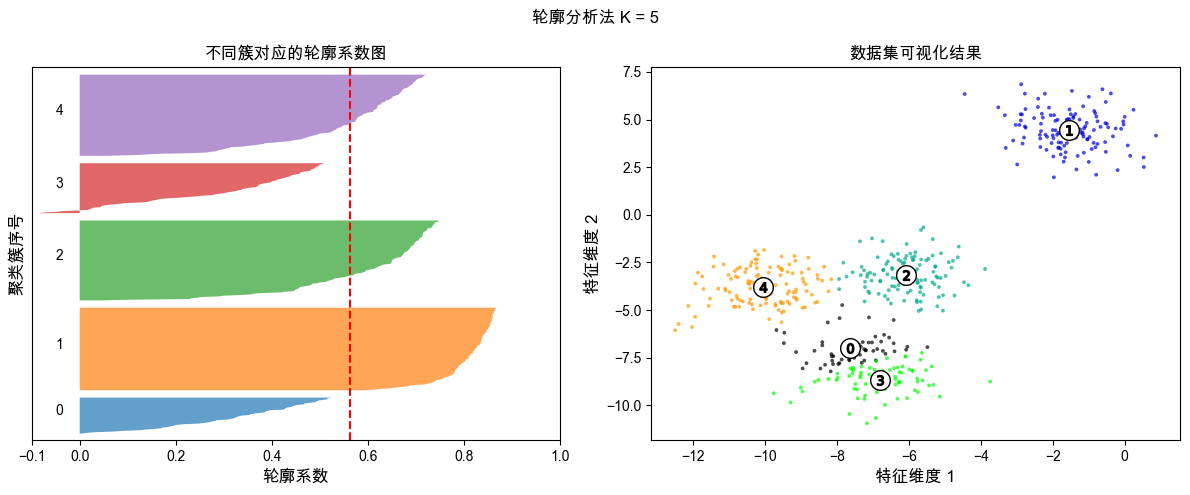

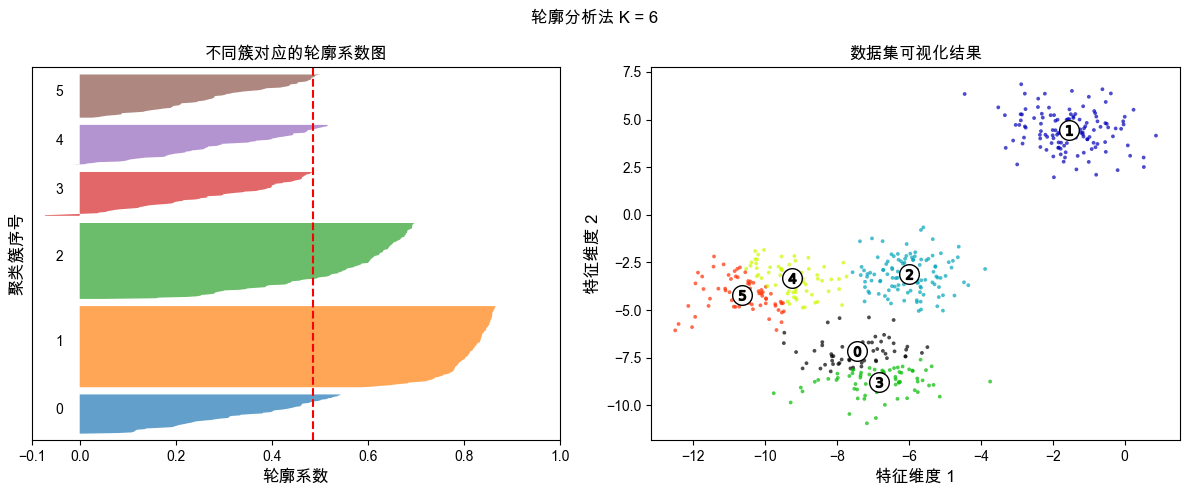

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import numpy as np

if __name__ == '__main__':
    X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=True, random_state=1)
    range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)  # 创建一个1行2列的子图
        fig.set_size_inches(12, 5)  # 画布大小
        ax1.set_xlim([-0.1, 1])  # 设置x轴的范围（轮廓系数）
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # 顶端的间隙
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_
        silhouette_avg = silhouette_score(X, cluster_labels)  # 所有样本的轮廓系数均值
        print(" 当 n_clusters = ", n_clusters, "时，轮廓系数为: ", silhouette_avg)
        # 计算每个样本对应的轮廓系数
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):  # 遍历每一个簇
            # 取第i个簇中对应所有样本的轮廓系数，并进行排序
            s_values = sample_silhouette_values[cluster_labels == i]
            s_values.sort()
            size_cluster_i = s_values.shape[0]  # 得到第i个簇的样本数量
            y_upper = y_lower + size_cluster_i  # 图中每个簇在y轴上的宽度
            # 限定y的范围，填充x1和x2所围成的区域
            ax1.fill_betweenx(y=np.arange(y_lower, y_upper), x1=0, x2=s_values, alpha=0.7)
            # 在y轴右侧标记每个簇的序号
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # 计算下一个条形图y轴的其实值
            y_lower = y_upper + 10  # 10 for the 0 samples
        fm.fontManager.addfont('../data/SimHei.ttf')
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来  正常显示中文标签
        ax1.set_title("不同簇对应的轮廓系数图", fontsize=12)
        ax1.set_xlabel("轮廓系数", fontsize=12)
        ax1.set_ylabel("聚类簇序号", fontsize=12)

        # 以x=silhouette_avg 画一条平行于y轴的线
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # 去掉y轴的刻度
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # 设置x轴的刻度

        # 可视化每个簇
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)  # 定义每个簇的颜色
        ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
        # Labeling the clusters
        ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k", )

        for i, c in enumerate(centers):  # 给每个簇标记序号
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("数据集可视化结果", fontsize=12)
        ax2.set_xlabel("特征维度 1", fontsize=12)
        ax2.set_ylabel("特征维度 2", fontsize=12)
        plt.suptitle("轮廓分析法 K = %d"
                     % n_clusters, fontsize=12, fontweight="bold", )
        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
        plt.tight_layout()

    plt.show()
